<img src="https://raw.githubusercontent.com/maverick-faus/Files/master/DeepDeamon2.png" alt="drawing" width="100px"/>
# Data preprocessing - 4B Net
TT: Deep Deep Dishes  
Food recommendation System  
ESCOM  
By Faus - 2K18

In [1]:
import pickle
import shutil
import csv
import glob
import os
import time
import numpy as np
from PIL import Image,ImageOps #Imagen
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
#Mover los archivos con etiqueta a otra carpeta
src = "Todas/"
dst = "Etiquetadas/"
with open("out_4B.csv", "r") as f:
    
    reader = csv.reader(f)
    for row in reader:
        shutil.move(src+row[0], dst+row[0])

FileNotFoundError: [Errno 2] No such file or directory: 'Todas/97.jpg'

In [3]:
#Change JPEG to JPG extension
for thisFile in glob.glob('Etiquetadas/*.JPEG'):
    base = os.path.splitext(thisFile)[0]
    os.rename(thisFile, base + ".jpg")
for thisFile in glob.glob('Etiquetadas/*.GIF'):
    base = os.path.splitext(thisFile)[0]
    os.rename(thisFile, base + ".jpg")
for thisFile in glob.glob('Etiquetadas/*.PNG'):
    base = os.path.splitext(thisFile)[0]
    os.rename(thisFile, base + ".jpg")
for thisFile in glob.glob('Etiquetadas/*.jpeg'):
    base = os.path.splitext(thisFile)[0]
    os.rename(thisFile, base + ".jpg")
for thisFile in glob.glob('Etiquetadas/*.JPG'):
    base = os.path.splitext(thisFile)[0]
    os.rename(thisFile, base + ".jpg")

# Redimensionar

In [4]:
#Crear una lista que contiene todas las imagenes de la carpeta
l_img = glob.glob("Etiquetadas/*.jpg")

#Iterar para cada elemento de la lista
for item in l_img:
    try:
        l_aux = item.split('\\')
        img = Image.open(item)
        img = img.convert('RGB')
        im = ImageOps.fit(img,(200,200),Image.ANTIALIAS) #Recibe la imagen, el tamaño, el tipo de filtro
        im.save("Redim/"+l_aux[1]) #Escribe la imagen resultante en el directorio "Redim"
    except: 
        print(l_aux[1])
#Algunas tuvieron errores, el except las imprime

# Definir funciónes de etiqueta a One-Hot

In [26]:
def precio_oneHot(arg):
    switcher = {
        1: [1,0,0,0,0],
        2: [0,1,0,0,0],
        3: [0,0,1,0,0],
        4: [0,0,0,1,0],
        5: [0,0,0,0,1]
    }
    return switcher[arg]

def pan_oneHot(arg):
    switcher = {
        1: [1,0,0,0],
        2: [0,1,0,0],
        3: [0,0,1,0],
        4: [0,0,0,1]
    }
    return switcher[arg]

def guar_oneHot(arg):
    switcher = {
        1: [1,0,0],
        2: [0,1,0],
        3: [0,0,1]
    }
    return switcher[arg]

# Crear arreglo numpy

In [27]:
#Abrimos archivo csv
with open("Out_4B.csv",newline='') as csvfile:
    spamreader = csv.reader(csvfile,quotechar=',') #Separa cada fila del csv como un elemento de una lista
    l=[]
    for element in spamreader: 
        #En este caso:
        #element[0] = Nombre del archivo 
        #element[1] = Precio
        #element[2] = Estilo 
        #element[3] = Pan
        #element[4] = Guarnicion
        name=element[0]
        print(name)
        name=name.replace("gif","jpg")
        name=name.replace("png","jpg")
        name=name.replace("jpeg","jpg")
        try:
            np_arr = np.array(Image.open("Redim/"+name))
            l.append([np_arr,
            precio_oneHot(int(element[1])),
            precio_oneHot(int(element[2])),          
            pan_oneHot(int(element[3])),         
            guar_oneHot(int(element[4])),        
            ]) #Siempre utilizar One Hot - Aplicar capa softmax a la salida del clasificador
        except:
            print("Fail in "+element[0])
    l=shuffle(l)

97.jpg
263.jpg
124.jpg
132.jpg
208.jpg
83.jpg
218.jpg
170.jpg
160.jpg
203.jpg
236.jpg
182.jpg
235.jpg
85.jpg
142.jpg
177.jpg
199.jpg
169.jpg
84.jpg
118.jpg
73.jpg
58.jpg
175.jpg
105.jpg
220.jpg
246.jpg
64.jpg
86.jpg
264.jpg
140.jpg
113.jpg
72.jpg
109.jpg
226.jpg
164.jpg
190.jpg
225.jpg
217.jpg
89.jpg
125.jpg
94.jpg
112.jpg
117.jpg
186.jpg
167.jpg
194.jpg
200.jpg
107.jpg
244.jpg
215.jpg
158.jpg
269.jpg
137.jpg
172.jpg
213.jpg
173.jpg
54.jpg
99.jpg
63.jpg
100.jpg
174.jpg
87.jpg
103.jpg
144.jpg
256.jpg
92.jpg
165.jpg
260.jpg
133.jpg
234.jpg
101.jpg
148.jpg
150.jpg
271.jpg
121.jpg
93.jpg
232.jpg
98.jpg
262.jpg
219.jpg
251.jpg
197.jpg
249.jpg
152.jpg
163.jpg
155.jpg
230.jpg
106.jpg
74.jpg
114.jpg
60.jpg
69.jpg
96.jpg
80.jpg
161.jpg
265.jpg
267.jpg
88.jpg
178.jpg
168.jpg
159.jpg
141.jpg
78.jpg
77.jpg
153.jpg
147.jpg
176.jpg
166.jpg
52.jpg
75.jpg
277.jpg
57.jpg
198.jpg
228.jpg
143.jpg
108.jpg
231.jpg
210.jpg
188.jpg
201.jpg
233.jpg
250.jpg
79.jpg
56.jpg
278.jpg
138.jpg
157.jpg
259.jpg
261.jpg

989.jpg
1072.jpg
1224.jpg
1058.jpg
1229.jpg
999.jpg
994.jpg
1142.jpg
1073.jpg
1018.jpg
1016.jpg
1148.jpg
1232.jpg
1022.jpg
1057.jpg
975.jpg
1573.jpg
1328.jpg
1358.jpg
1363.jpg
1318.jpg
1289.jpg
1283.jpg
1398.jpg
1373.jpg
1370.jpg
1475.jpg
1417.jpg
1501.jpg
1462.jpg
1348.jpg
1323.jpg
1304.jpg
1311.jpg
1495.jpg
1376.jpg
1454.jpg
1437.jpg
1282.jpg
1478.jpg
1306.jpg
1489.jpg
1562.jpg
1290.jpg
1528.jpg
1522.jpg
1387.jpg
1378.jpg
1440.jpg
1364.jpg
1379.jpg
1463.jpg
1310.jpg
1342.jpg
1518.jpg
1584.jpg
1531.jpg
1345.jpg
1461.jpg
1350.jpg
1301.jpg
1578.jpg
1568.jpg
1577.jpg
1351.jpg
1366.jpg
1430.jpg
1278.jpg
1486.jpg
1481.jpg
1470.jpg
1292.jpg
1439.jpg
1401.jpg
1473.jpg
1563.jpg
1519.jpg
1343.jpg
1468.jpg
1443.jpg
1552.jpg
1298.jpg
1542.jpg
1484.jpg
1570.jpg
1285.jpg
1329.jpg
1466.jpg
1383.jpg
1457.jpg
1515.jpg
1546.jpg
1451.jpg
1445.jpg
1520.jpg
1493.jpg
1307.jpg
1583.jpg
1362.jpg
1506.jpg
1280.jpg
1340.jpg
1561.jpg
1274.jpg
1287.jpg
1391.jpg
1367.jpg
1344.jpg
1295.jpg
1494.jpg
1317.jpg
1296.

2_3327.jpeg
2_3328.jpg
2_3329.jpeg
2_333.jpeg
2_3330.jpg
2_3333.jpeg
2_3334.jpg
2_3335.jpeg
2_3339.jpeg
2_334.jpeg
2_3340.jpg
2_3341.jpeg
2_3343.jpg
2_3344.jpeg
2_3345.jpg
2_3346.jpeg
2_3347.jpg
2_3348.jpeg
2_3349.jpg
2_335.jpg
2_3350.jpeg
2_3351.jpg
2_3352.jpeg
2_3355.jpg
2_3358.jpeg
2_3359.jpg
2_336.jpg
2_3360.jpeg
2_3361.jpg
2_3362.jpeg
2_3363.jpg
2_3364.jpg
2_3366.jpg
2_3367.jpeg
2_3368.jpg
2_337.jpg
2_3370.jpg
2_3371.jpeg
2_3372.jpg
2_3373.jpeg
2_3374.jpg
2_3375.jpg
2_3376.jpeg
2_3377.jpg
2_3378.jpeg
2_3380.jpeg
2_3381.jpg
2_3382.jpeg
2_3383.jpg
2_3384.jpeg
2_3387.jpg
2_3388.jpeg
2_3389.jpg
2_339.jpeg
2_3390.jpeg
2_3391.jpg
2_3392.jpeg
2_3393.jpg
2_3394.jpeg
2_3395.jpg
2_3398.jpg
2_3399.jpeg
2_34.jpg
2_340.jpeg
2_3400.jpg
2_3402.jpg
2_3403.jpeg
2_3405.jpeg
2_3406.jpg
2_3407.jpeg
2_3409.jpg
2_3410.jpeg
2_3411.jpg
2_3412.jpeg
2_3413.jpg
2_3414.jpeg
2_3415.jpg
2_3416.jpeg
2_3417.jpg
2_342.jpeg
2_3421.jpeg
2_3422.jpg
2_3423.jpeg
2_3424.jpg
2_3426.jpg
2_3427.jpeg
2_3428.jpg
2_3429.jpeg

2_211.jpg
2_2112.jpeg
2_2115.jpeg
2_2118.jpeg
2_212.jpeg
2_2122.jpg
2_2127.jpg
2_213.jpg
2_2132.jpeg
2_2134.jpg
2_2135.jpg
2_2136.jpg
2_214.jpg
2_2140.jpeg
2_2147.jpg
2_215.jpeg
2_2150.jpg
2_2152.jpg
2_2153.jpeg
2_2154.jpg
2_2157.jpg
2_216.jpg
2_2161.jpg
2_2164.jpeg
2_2167.jpeg
2_2168.jpg
2_2179.jpg
2_218.jpg
2_2186.jpeg
2_2187.jpeg
2_2188.jpeg
2_2189.jpg
2_219.jpeg
2_2191.jpeg
2_2193.jpeg
2_2194.jpeg
2_2196.jpeg
2_22.jpeg
2_220.jpg
2_2201.jpeg
2_2206.jpeg
2_2207.jpeg
2_221.jpeg
2_2216.jpeg
2_222.jpg
2_2232.jpg
2_2233.jpeg
2_2234.jpeg
2_2236.jpeg
2_2239.jpeg
2_224.jpg
2_2240.jpg
2_2242.jpeg
2_2243.jpeg
2_2248.jpeg
2_225.jpg
2_2250.jpg
2_2251.jpeg
2_2255.jpeg
2_2256.jpeg
2_2257.jpeg
2_226.jpg
2_2263.jpeg
2_227.jpeg
2_2270.jpeg
2_2274.jpeg
2_2275.jpeg
2_2277.jpeg
2_228.jpg
2_2280.jpeg
2_2283.jpeg
2_2284.jpeg
2_2285.jpeg
2_2286.jpeg
2_2288.jpeg
2_229.jpeg
2_2290.jpeg
2_2292.jpeg
2_2293.jpg
2_2298.jpeg
2_2299.jpeg
2_23.jpg
2_230.jpg
2_2300.jpeg
2_2307.jpeg
2_2309.jpeg
2_231.jpeg
2_2310.jpg

[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0]
[0, 0, 1]


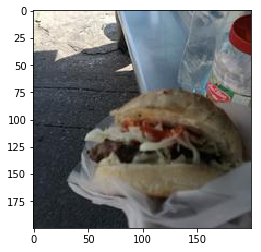

In [50]:
#Verificamos que la imagen esté correctamente almacenada
l=shuffle(l)
print(l[0][1])
print(l[0][2])
print(l[0][3])
print(l[0][4])
plt.imshow(l[0][0])
plt.show()

In [51]:
len(l)
training = l[0:len(l)-200]
testing = l[len(l)-200:len(l)+1]

# Crear pickle

In [52]:
#Dado el tamaño del conjunto, se optó por almacenar 1 archivo .pickle, en este caso, con 5807 imágenes el archivo pesa 680MB
pickle.dump(testing[0:len(testing)],open("4B_test.pickle","wb"))
pickle.dump(training[0:len(training)],open("4B_train.pickle","wb"))

Verificar Pickle

[0, 1, 0, 0, 0]


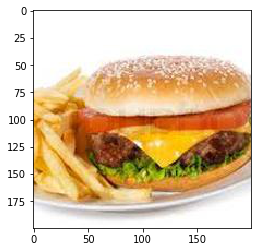

In [53]:
aux =  pickle.load(open("4B_test.pickle","rb"))
print(aux[20][1])
plt.imshow(aux[20][0])
plt.show()